<a href="https://colab.research.google.com/github/paolagaro/Capstone-Project-/blob/main/Federal_Family_Education_Loan_Program_(FFEL_2009_2010).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Federal Family Education Loan Program (FFEL / 2009-2010)**

This analysis examines **FFEL** student loan data for the **2009-2010** academic year. Using Python, I merged, cleaned, and prepared the data to answer key questions related to loan volume and distribution by type, institution, and state.

1- I **uploaded** 4 Excel files in `.csv` format corresponding to the 4 quarters of the academic year:
- `FFEL_Q1.csv`
- `FEEL_Q2.csv`
- `FFEL_Q3.csv`
- `FFEL_Q4.csv`

2- **Header Correction**
After converting the files from `.xls` to `.csv`, many of the files contained empty rows or misplaced headers, so I used the `skiprows=3` parameter to skip the first irrelevant rows.
- I had to define the column names manually to ensure consistency in each file.

After loading and correcting the headers, I **merged all the files into a single** DataFrame (`df_comb`) to have a single dataset for easier analysis.

In [ ]:
import pandas as pd

files = ['FFEL_Q1.csv', 'FEEL_Q2.csv', 'FFEL_Q3.csv', 'FFEL_Q4.csv']

crrct_clmns = [
    'OPE ID', 'School', 'State', 'Zip Code', 'School Type',
    'Recipients', '# of Loans Originated', '$ of Loans Originated', '# of Disbursements', '$ of Disbursements',
    'Recipients.1', '# of Loans Originated.1', '$ of Loans Originated.1', '# of Disbursements.1', '$ of Disbursements.1',
    'Recipients.2', '# of Loans Originated.2', '$ of Loans Originated.2', '# of Disbursements.2', '$ of Disbursements.2',
    'Recipients.3', '# of Loans Originated.3', '$ of Loans Originated.3', '# of Disbursements.3', '$ of Disbursements.3'
]

dfs = []
for file in files:
    df = pd.read_csv(file, skiprows=3, header=None)
    df.columns = crrct_clmns
    dfs.append(df)


df_comb = pd.concat(dfs, ignore_index=True)
df_comb.head()

,OPE ID,School,State,Zip Code,School Type,Recipients,# of Loans Originated,$ of Loans Originated,# of Disbursements,$ of Disbursements,...,Recipients.2,# of Loans Originated.2,$ of Loans Originated.2,# of Disbursements.2,$ of Disbursements.2,Recipients.3,# of Loans Originated.3,$ of Loans Originated.3,# of Disbursements.3,$ of Disbursements.3
0,106300,UNIVERSITY OF ALASKA FAIRBANKS,AK,997757500,PUBLIC,"1,413","1,434","$6,394,735.00","1,455","$3,290,699.00",...,36,40,"$265,784.00",40,"$138,160.00",4,4,"$68,620.00",4,"$28,988.00"
1,106500,UNIVERSITY OF ALASKA SOUTHEAST,AK,998018680,PUBLIC,406,409,"$1,866,473.00",439,"$1,044,946.00",...,8,8,"$88,046.00",8,"$44,024.00",-,-,$-,0,$-
2,1146200,UNIVERSITY OF ALASKA ANCHORAGE,AK,995088050,PUBLIC,"2,998","3,042","$12,780,036.00","3,045","$6,440,086.00",...,123,125,"$1,288,224.00",125,"$645,683.00",9,11,"$43,878.00",11,"$24,063.00"
3,2541000,ALASKA CAREER COLLEGE,AK,995071033,PROPRIETARY,38,38,"$103,869.00",38,"$52,178.00",...,-,-,$-,0,$-,-,-,$-,0,$-
4,2576900,CHARTER COLLEGE,AK,995084103,PROPRIETARY,192,192,"$516,838.00",193,"$255,514.00",...,4,4,"$20,866.00",5,"$12,783.00",-,-,$-,0,$-


# 3- **Limpieza de Datos**
En esta parte, realelize varios cambios y correcciones para asegurar que los datos fueran adecuados para el análisis como identificar y **llenar los Valores nulos con 0** en las columnas numéricas.** Duplicados**: Elimine registros duplicados para evitar que se repitieran los mismos datos tener un resuldato preciso. Estandarización de texto: Las columnas de textos fueron estandarizadas para eliminar espacios innecesarios y cambiar a mayúsculas.

In [ ]:
df_comb.fillna(0, inplace=True)
df_comb.drop_duplicates(inplace=True)

text_cols = ['School', 'State', 'School Type']
for col in text_cols:
    if col in df_comb.columns:
        df_comb[col] = df_comb[col].astype(str).str.strip().str.upper()




In [ ]:
print(df_comb['# of Loans Originated'].head(10))

0     1,434 
1       409 
2     3,042 
3        38 
4       192 
5        28 
6     2,692 
7     1,403 
8     1,201 
9       487 
Name: # of Loans Originated, dtype: object


4- **Monetary Value Conversion**: Columns containing monetary amounts were removed, such as the $ sign, commas, and dashes, and converted to float values ​​to facilitate the mathematical operations of the analysis.

In [ ]:
num_cols = [col for col in df_comb.columns if
            col.startswith('#') or
            col.startswith('$') or
            'Recipients' in col]

df_comb = df_comb[df_comb['# of Loans Originated'] != '# of Loans Originated']

for col in num_cols:
    df_comb[col] = df_comb[col].astype(str)
    df_comb = df_comb[~df_comb[col].str.contains('[A-Za-z]', na=False)]
    df_comb[col] = (
        df_comb[col]
        .str.replace(r'[\$,]', '', regex=True)
        .str.replace('-', '0')
        .str.replace('nan', '0')
        .fillna('0')
        .astype(float)
    )

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3796 entries, 0 to 3795
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   OPE ID                   3794 non-null   object
 1   School                   3794 non-null   object
 2   State                    3794 non-null   object
 3   Zip Code                 3775 non-null   object
 4   School Type              3794 non-null   object
 5   Recipients               3795 non-null   object
 6   # of Loans Originated    3794 non-null   object
 7   $ of Loans Originated    3794 non-null   object
 8   # of Disbursements       3794 non-null   object
 9   $ of Disbursements       3794 non-null   object
 10  Recipients.1             3795 non-null   object
 11  # of Loans Originated.1  3794 non-null   object
 12  $ of Loans Originated.1  3794 non-null   object
 13  # of Disbursements.1     3794 non-null   object
 14  $ of Disbursements.1     3794 non-null  

5- **Exporting a New CSV File**: The cleaned DataFrame was exported as df_cleaned.csv so it could be used in Power BI for deeper analysis and to generate visual and comparative reports. I also saved a summarized version to facilitate analysis in Power BI.

In [ ]:
df_comb.to_csv('FFEL_combined_clean.csv', index=False)


In [ ]:
resumen_cols = [
    'OPE ID', 'School', 'State', 'School Type',
    '# of Loans Originated', '$ of Loans Originated',
    '# of Disbursements', '$ of Disbursements',
    '# of Loans Originated.1', '$ of Loans Originated.1',
    '# of Disbursements.1', '$ of Disbursements.1',
    '# of Loans Originated.2', '$ of Loans Originated.2',
    '# of Disbursements.2', '$ of Disbursements.2',
    '# of Loans Originated.3', '$ of Loans Originated.3',
    '# of Disbursements.3', '$ of Disbursements.3'
]

df_resumen = df_comb[resumen_cols]

df_resumen.to_csv('FFEL_clean_resumen.csv', index=False)


---
#- Begin analyzing the data to try to answer my project's questions.

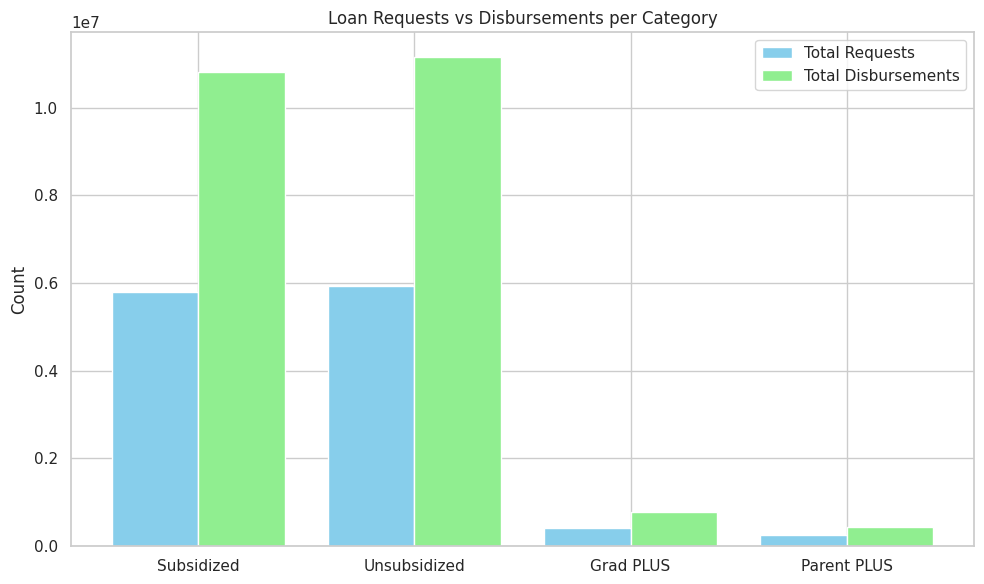

       Category  Total Requests  Total Disbursements
1  Unsubsidized       5933186.0           11160444.0
0    Subsidized       5782178.0           10821253.0
2     Grad PLUS        411818.0             772286.0
3   Parent PLUS        243189.0             437327.0


In [63]:
Categories = {
    'Subsidized': {
        'loans': '# of Loans Originated',
        'disbursements': '# of Disbursements'
    },
    'Unsubsidized': {
        'loans': '# of Loans Originated.1',
        'disbursements': '# of Disbursements.1'
    },
    'Grad PLUS': {
        'loans': '# of Loans Originated.2',
        'disbursements': '# of Disbursements.2'
    },
    'Parent PLUS': {
        'loans': '# of Loans Originated.3',
        'disbursements': '# of Disbursements.3'
    }
}


summary = []

for name, cols in Categories.items():
    loans_total = df_comb[cols['loans']].sum()
    disb_total = df_comb[cols['disbursements']].sum()
    summary.append({
        'Category': name,
        'Total Requests': loans_total,
        'Total Disbursements': disb_total
    })

df_summary = pd.DataFrame(summary)

# Plotting
x = df_summary['Category']
requests = df_summary['Total Requests']
disbursements = df_summary['Total Disbursements']

x_axis = range(len(x))

plt.figure(figsize=(10, 6))
plt.bar(x_axis, requests, width=0.4, label='Total Requests', align='center', color='skyblue')
plt.bar([i + 0.4 for i in x_axis], disbursements, width=0.4, label='Total Disbursements', align='center', color='lightgreen')

plt.xticks([i + 0.2 for i in x_axis], x)
plt.ylabel('Count')
plt.title('Loan Requests vs Disbursements per Category')
plt.legend()
plt.tight_layout()
plt.show()


df_summary = pd.DataFrame(summary)
df_summary_sorted = df_summary.sort_values(by='Total Requests', ascending=False)


print(df_summary_sorted)

-Here we can see that **the category loan with the most applications**, unlike what I expected, was the **Unsubsidized category**, with a total of **$5,933,186.00.** It was also the category with the highest number of disbursements in the 2009-2010 period

# Calculating Total Loan Requests and Disbursements
 In this code, I plot the total number of loan applications and the number of disbursements, then create a chart using the matplotlib library to visualize the differences.

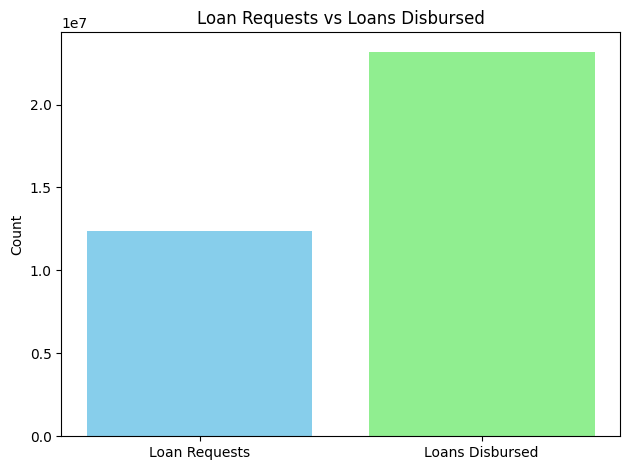

 Total number of requests: 12,370,371
 Total number of Disbursed: 23,191,310


In [ ]:
total_loan_rq = (
    df_comb['# of Loans Originated'] +
    df_comb['# of Loans Originated.1'] +
    df_comb['# of Loans Originated.2'] +
    df_comb['# of Loans Originated.3']
).sum()

total_loans_disb = (
    df_comb['# of Disbursements'] +
    df_comb['# of Disbursements.1'] +
    df_comb['# of Disbursements.2'] +
    df_comb['# of Disbursements.3']
).sum()

import matplotlib.pyplot as plt

labels = ['Loan Requests', 'Loans Disbursed']
values = [total_loan_rq, total_loans_disb]

plt.bar(labels, values, color=['skyblue', 'lightgreen'])
plt.title('Loan Requests vs Loans Disbursed')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

print(f" Total number of requests: {total_loan_rq:,.0f}")
print(f" Total number of Disbursed: {total_loans_disb:,.0f}")

-A DataFrame with the top 20 schools based on the number of loans requested to create a table in Excel to show the to 20 schools with most numbers os loan request and disbursements



In [ ]:
loan_categories = {
    'Subsidized': ['# of Loans Originated', '# of Disbursements'],
    'Unsubsidized': ['# of Loans Originated.1', '# of Disbursements.1'],
    'Grad PLUS': ['# of Loans Originated.2', '# of Disbursements.2'],
    'Parent PLUS': ['# of Loans Originated.3', '# of Disbursements.3']
}

school_category_data = []

for category, cols in loan_categories.items():
    df_temp = df_comb[['School'] + cols].copy()
    df_temp = df_temp.groupby('School', as_index=False).sum()
    df_temp['Loan Category'] = category
    df_temp = df_temp.rename(columns={
        cols[0]: 'Total Loans Originated',
        cols[1]: 'Total Disbursements'
    })
    school_category_data.append(df_temp)
df_school_categories = pd.concat(school_category_data)

top_20_schools_by_category = (
    df_school_categories
    .sort_values(by='Total Loans Originated', ascending=False)
    .groupby('Loan Category')
    .head(20)
)

top_20_schools_by_category.to_excel("Top_20_Schools_By_Loan_Category.xlsx", index=False)
top_20_schools_by_category.head()


,School,Total Loans Originated,Total Disbursements,Loan Category
3510,UNIVERSITY OF PHOENIX,351720.0,596035.0,Subsidized
3510,UNIVERSITY OF PHOENIX,336088.0,588392.0,Unsubsidized
943,DEVRY UNIVERSITY,123989.0,175459.0,Unsubsidized
943,DEVRY UNIVERSITY,113146.0,160022.0,Subsidized
1519,ITT TECHNICAL INSTITUTE,89618.0,220603.0,Subsidized


In [ ]:
loan_cols = [
    '# of Loans Originated', '# of Loans Originated.1',
    '# of Loans Originated.2', '# of Loans Originated.3'
]

disb_cols = [
    '# of Disbursements', '# of Disbursements.1',
    '# of Disbursements.2', '# of Disbursements.3'
]
df_comb['Total Loans Requested'] = df_comb[loan_cols].sum(axis=1)
df_comb['Total Disbursements'] = df_comb[disb_cols].sum(axis=1)

state_summary = df_comb.groupby('State')[['Total Loans Requested', 'Total Disbursements']].sum().reset_index()
state_summary['Disbursement Ratio'] = (state_summary['Total Disbursements'] / state_summary['Total Loans Requested']).round(2)
state_summary_sorted = state_summary.sort_values(by='Total Disbursements', ascending=False)

print(state_summary_sorted.head(10))


   State  Total Loans Requested  Total Disbursements  Disbursement Ratio
5     CA               834468.0            1717340.0                2.06
4     AZ               952614.0            1674658.0                1.76
42    PA               803571.0            1517632.0                1.89
17    IL               717897.0            1318317.0                1.84
48    TX               696619.0            1281435.0                1.84
11    FL               737322.0            1280513.0                1.74
38    NY               662467.0            1202662.0                1.82
39    OH               500110.0             993369.0                1.99
15    IA               355719.0             739097.0                2.08
27    MO               327398.0             629472.0                1.92


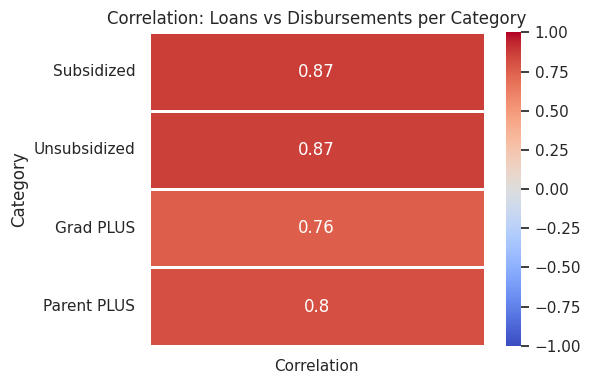

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt


Categories = {
    'Subsidized': {
        'loans': '# of Loans Originated',
        'disbursements': '# of Disbursements'
    },
    'Unsubsidized': {
        'loans': '# of Loans Originated.1',
        'disbursements': '# of Disbursements.1'
    },
    'Grad PLUS': {
        'loans': '# of Loans Originated.2',
        'disbursements': '# of Disbursements.2'
    },
    'Parent PLUS': {
        'loans': '# of Loans Originated.3',
        'disbursements': '# of Disbursements.3'
    }
}
correlation_data = {
    'Category': [],
    'Correlation': []
}

for category, cols in Categories.items():
    try:
        corr_value = df_comb[[cols['loans'], cols['disbursements']]].corr().iloc[0, 1]
    except Exception as e:
        corr_value = None
    correlation_data['Category'].append(category)
    correlation_data['Correlation'].append(corr_value)

df_corr = pd.DataFrame(correlation_data).set_index('Category')

plt.figure(figsize=(6, 4))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=1, cbar=True)
plt.title('Correlation: Loans vs Disbursements per Category')
plt.tight_layout()
plt.show()


# Conclusion:

In this Python analysis, I cleaned and processed a loan dataset to identify key patterns such as the correlation between the number of loans requested and disbursed. I used data manipulation techniques such as cleaning missing values, data conversion, and identifying correlations to gain valuable insights. Through this process, we were able to generate conclusions about the efficiency of the loan process and how applications and disbursements relate to each other.